# ASSIGNMENT 9

### Data Visualization 2

Use the inbuilt dataset 'titanic'. Plot a box plot for distribution of Age with repect to gender along with the information whether they survived or not. 
Write observations on the inference from the above statistics.

## > Importing required libraries, reading the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic1.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## > Data Preprocessing

In [5]:
#checks total size(rows*columns)
df.size

10692

In [6]:
#checks dimensions of dataframe
df.shape

(891, 12)

In [7]:
#checks initial statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#prints information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#checks for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since null values are present, we deal with them before visualizing our dataset.

## > Data Formatting

In [10]:
df = df.dropna()

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df.drop(['Cabin'],axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S


In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## > Data Visualizations

The process of finding trends and correlations in our data by representing it pictorially is called Data Visualization. To perform data visualization in python, we can use various python data visualization modules such as Matplotlib, Seaborn, Plotly, etc.

#### COUNT PLOT

A countplot is a type of bar plot that displays the count of occurrences of each category in a categorical variable. In Python, you can create a countplot using libraries like Seaborn. Here are the basic parameters typically used to create a countplot:

    1.data: The dataset or DataFrame containing the categorical variable.
    2.x or y: The variable to be displayed on the x-axis or y-axis, respectively.
    3.hue (optional): A variable used to group the countplot by different colors. It creates separate bars for each category based on the hue variable.
    4.order or hue_order (optional): The order in which the categories or hue levels should be displayed.
    5.palette (optional): A color palette to customize the colors of the bars.
    6.orient (optional): Specifies whether the bars should be vertical ("v") or horizontal ("h").
    7.ax (optional): The Axes object on which the countplot will be drawn.
    8.(additional parameters): There are more parameters available to customize the aesthetics and appearance of the countplot, such as linewidth, edgecolor, saturation, dodge, etc

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

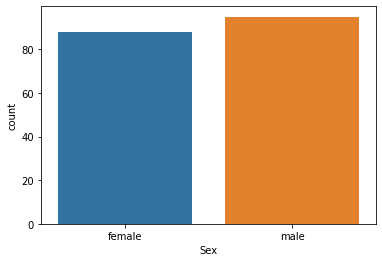

In [15]:
sns.countplot(df.Sex)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

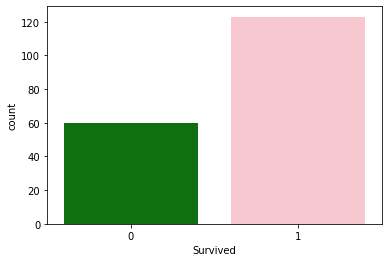

In [16]:
color=['green','pink']
sns.countplot(df.Survived,palette=color)

#### PIE CHART

A pie chart is a circular statistical graphic divided into slices to represent proportions or percentages of a whole. In Python, you can create a pie chart using libraries like Matplotlib or Seaborn. Here are the basic parameters typically used to create a pie chart:

    1.labels: A list of labels representing the categories or names associated with each slice of the pie.
    2.sizes: A list of sizes or values representing the proportions or percentages associated with each slice.
    3.colors (optional): A list of colors to assign to each slice. It can be a single color or a list of colors corresponding to each label.
    4.explode (optional): A list or tuple indicating the fraction of the radius by which to offset each slice from the center. It is useful for emphasizing specific slices.
    5.autopct (optional): A string or function used to format the percentage value displayed on each slice.
    6.startangle (optional): The angle in degrees at which the first slice starts. The default is usually set to 0, which corresponds to the positive x-axis.
    7.shadow (optional): A boolean value indicating whether to display a shadow effect behind the pie chart.
    8.radius (optional): The radius of the pie chart. By default, it is set to 1.

<AxesSubplot:ylabel='Sex'>

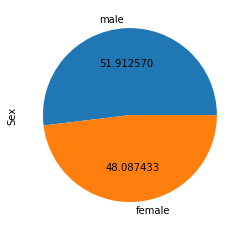

In [17]:
df['Sex'].value_counts().plot(kind='pie',autopct='%2f')

<AxesSubplot:ylabel='Sex'>

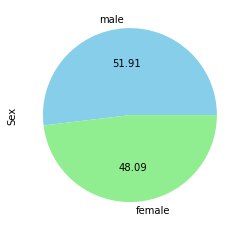

In [18]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f',colors=['skyblue','lightgreen'])

<AxesSubplot:ylabel='Survived'>

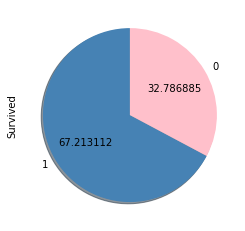

In [19]:
df['Survived'].value_counts().plot(kind='pie',autopct='%2f',colors=['steelblue','pink'],shadow=True,startangle=90)

<AxesSubplot:ylabel='Age'>

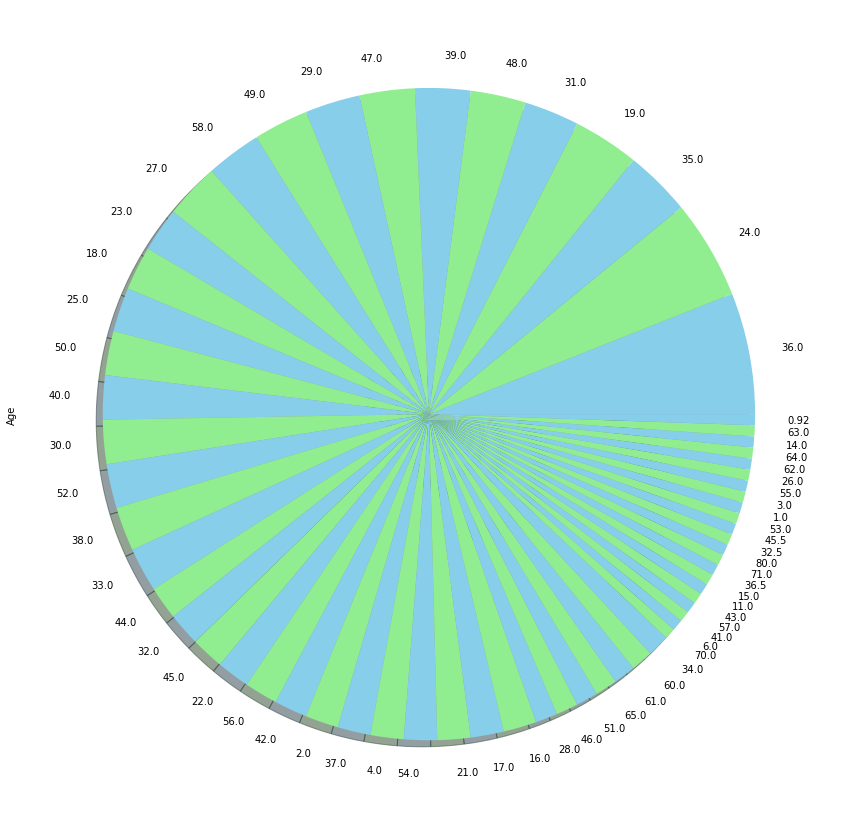

In [20]:
plt.figure(figsize=(15,15))
df['Age'].value_counts().plot(kind='pie',colors=['skyblue','lightgreen'],shadow=True)

#### BAR PLOT

A bar plot is a visualization technique that represents categorical data with rectangular bars, where the length of each bar corresponds to the magnitude of the data. Seaborn's barplot() function simplifies the creation of bar plots by providing a high-level interface to generate them with customizable aesthetics.

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

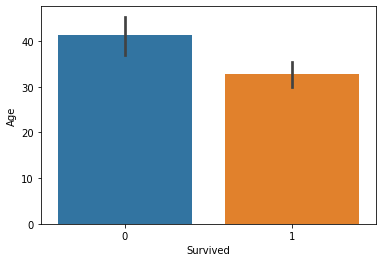

In [21]:
sns.barplot(df['Survived'],df['Age'])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

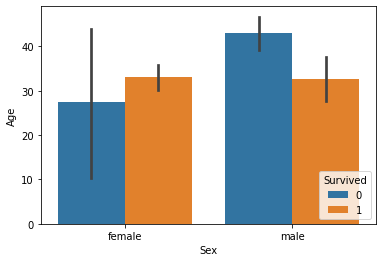

In [22]:
sns.barplot(df['Sex'],df['Age'],hue=df['Survived'])

#### BOX PLOT

A boxplot is a statistical visualization that displays the distribution of a numeric variable through quartiles, median, and outliers.

Its parameters include:

    1.x or y: The variable to be displayed on the x-axis or y-axis, respectively.
    2.data: The dataset or DataFrame containing the variable to be plotted.
    3.hue (optional): Grouping variable that creates separate boxplots for different categories.
    4.order or hue_order (optional): The order in which the categories or hue levels should be displayed.
    5.ax (optional): The Axes object on which the boxplot will be drawn.
Additional parameters can be used to customize the appearance, such as color, linewidth, notch, and whisker length.

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

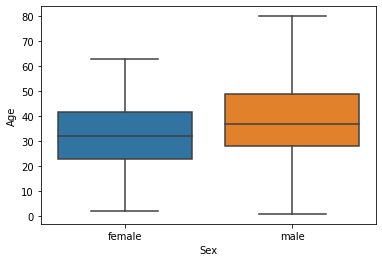

In [23]:
sns.boxplot(df['Sex'],df['Age'])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

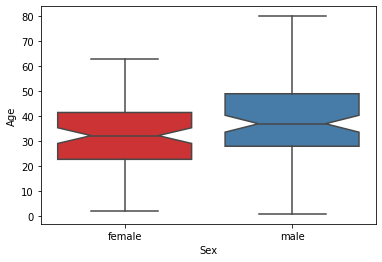

In [24]:
sns.boxplot(df['Sex'],df['Age'],palette='Set1',notch=True)

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

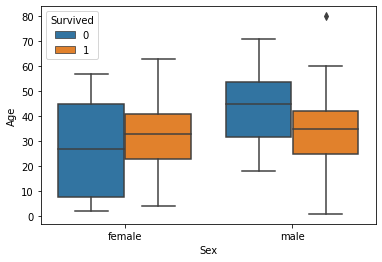

In [25]:
sns.boxplot(df['Sex'],df['Age'],hue=df['Survived'])

#### VIOLIN PLOT

A violin plot is a statistical visualization that combines a box plot and a kernel density plot. It displays the distribution of a numeric variable across different categories. 

Here are the parameters typically used to create a violin plot:

    1.x or y: The variable to be displayed on the x-axis or y-axis, respectively.
    2.data: The dataset or DataFrame containing the variable to be plotted.
    3.hue (optional): Grouping variable that creates separate violin plots for different categories.
    4.order or hue_order (optional): The order in which the categories or hue levels should be displayed.
    5.split (optional): If True, violins are split at the center for each category, displaying half on each side.
    6.inner (optional): Type of plot to be drawn inside the violin, such as "box" or "quartile".
    7.scale (optional): Method to scale the width of each violin. "area" scales them based on the area under the curve, while "width" scales them to have the same maximum width.
    8.bw (optional): Bandwidth parameter for the kernel density estimation.
    9.cut (optional): Proportion of the data to cut off from the extreme ends of the distribution.
    10.ax (optional): The Axes object on which the violin plot will be drawn.

Additional parameters can be used to customize the appearance, such as color, linewidth, edgecolor, and inner/outer quartile values.
Please note that the availability of specific parameters may vary depending on the plotting library or version being used (e.g., Seaborn or Matplotlib).








C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

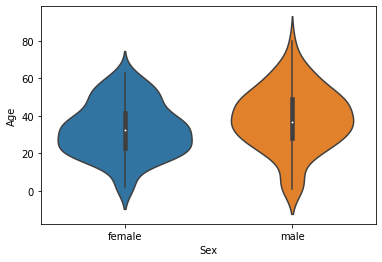

In [26]:
sns.violinplot(df['Sex'],df['Age'])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

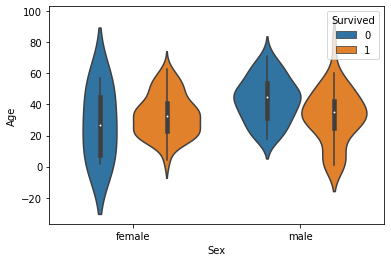

In [27]:
sns.violinplot(df['Sex'],df['Age'],hue=df['Survived'])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Fare'>

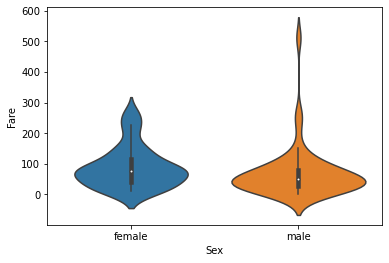

In [28]:
sns.violinplot(df['Sex'],df['Fare'])

#### HEAT MAP

A heatmap is a graphical representation of data where values are encoded as colors in a matrix-like grid. It is commonly used to visualize relationships and patterns in datasets. Here are the parameters typically used to create a heatmap:

    1.data: The dataset or 2D array containing the data to be visualized.
    2.annot (optional): If True, the values will be displayed on the heatmap.
    3.cmap (optional): The colormap to be used for coloring the heatmap.
    4.linewidths (optional): The width of the lines that separate each cell in the heatmap.
    5.linecolor (optional): The color of the lines that separate each cell in the heatmap.
    6.xticklabels and yticklabels (optional): If True, the labels of the x-axis and y-axis, respectively, will be displayed.
    7.cbar (optional): If True, a colorbar indicating the mapping of values to colors will be displayed.
    8.cbar_kws (optional): Additional keyword arguments to customize the colorbar.
    9.ax (optional): The Axes object on which the heatmap will be drawn.

Additional parameters can be used to adjust the size, title, aspect ratio, and other visual properties of the heatmap.

In the context of creating a heatmap:

    crosstab is used to calculate the frequency distribution of categorical variables, which can be visualized using a heatmap.

    corr is used to calculate the correlation coefficients between numerical variables, which can be visualized in a correlation matrix heatmap.
    
In both cases, the resulting data (frequency table or correlation matrix) can be passed as the input data to the heatmap function.

Some commonly used cmap options are:

    "viridis": A perceptually uniform colormap with a smooth transition from blue to yellow to red.
    "plasma": A colormap that goes from dark blue to pinkish colors, with bright yellow at the midpoint.
    "coolwarm": A diverging colormap with cool colors for negative values, warm colors for positive values, and a neutral white at the midpoint.
    "RdYlBu": A diverging colormap with red and blue hues, ranging from dark blue to dark red with a white midpoint.
    "BuGn": A sequential colormap that transitions from light blue to dark green.
    "YlOrRd": A sequential colormap that transitions from yellow to orange to red.

Also, 'Set1/2/3' , 'Blues','Greys','BuPu','YlGnBu','.2/.2/0/1',etc.

In [29]:
corr = df.corr()

<AxesSubplot:>

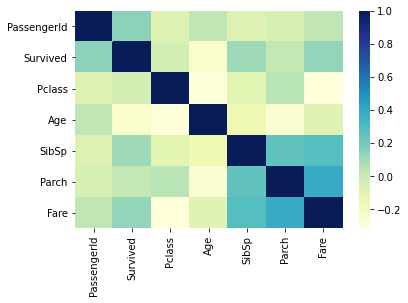

In [30]:
sns.heatmap(corr,cmap='YlGnBu')

In [31]:
pd.crosstab(df.Sex,df.Survived)

Survived,0,1
Sex,,
female,6,82
male,54,41


In [32]:
pd.crosstab(df.Survived,df.Age)

Age,0.92,1.00,2.00,3.00,4.00,6.00,11.00,14.00,15.00,16.00,...,58.00,60.00,61.00,62.00,63.00,64.00,65.00,70.00,71.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,0,0,0,0,0,0,...,2,0,2,1,0,1,2,1,1,0
1,1,1,1,1,3,1,1,1,1,3,...,3,2,0,0,1,0,0,0,0,1


<AxesSubplot:xlabel='Sex', ylabel='Age'>

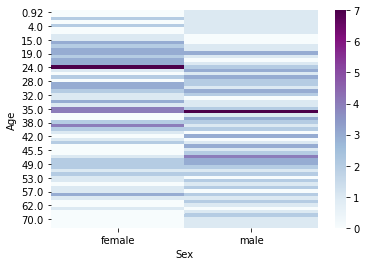

In [33]:
sns.heatmap(pd.crosstab(df.Age,df.Sex),cmap='BuPu')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

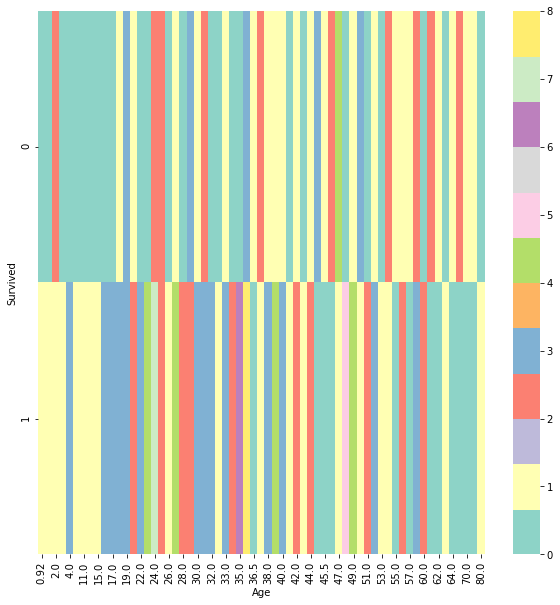

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.crosstab(df.Survived,df.Age),cmap='Set3')